In [11]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [12]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [14]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [19]:
index=10
x_train[index]

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

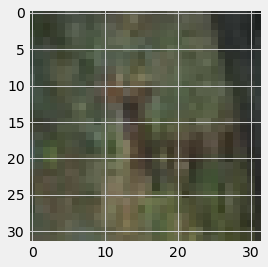

In [20]:
img=plt.imshow(x_train[index])

In [22]:
print('Image Label: ', y_train[index])

Image Label:  [4]


In [23]:
classification=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Image class: ', classification[y_train[index][0]])

Image class:  deer


In [24]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot= to_categorical(y_test)

In [25]:
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [26]:
x_train=x_train/255
x_test=x_test/255

In [27]:
x_train[index]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

In [28]:
model=Sequential()
model.add(Conv2D(32,(5,5), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(250, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [29]:
model.compile(loss = 'categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [31]:
hist=model.fit(x_train, y_train_one_hot,
               batch_size=256,
               epochs=10,
               validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 72s 364ms/step - loss: 1.9971 - accuracy: 0.2417 - val_loss: 1.5175 - val_accuracy: 0.4521
Epoch 2/10
157/157 [==============================] - 56s 359ms/step - loss: 1.4517 - accuracy: 0.4675 - val_loss: 1.3023 - val_accuracy: 0.5393
Epoch 3/10
157/157 [==============================] - 56s 358ms/step - loss: 1.2850 - accuracy: 0.5343 - val_loss: 1.1979 - val_accuracy: 0.5726
Epoch 4/10
157/157 [==============================] - 56s 359ms/step - loss: 1.1785 - accuracy: 0.5797 - val_loss: 1.1465 - val_accuracy: 0.6038
Epoch 5/10
157/157 [==============================] - 56s 358ms/step - loss: 1.0964 - accuracy: 0.6156 - val_loss: 1.0281 - val_accuracy: 0.6385
Epoch 6/10
157/157 [==============================] - 56s 359ms/step - loss: 1.0045 - accuracy: 0.6465 - val_loss: 1.0440 - val_accuracy: 0.6281
Epoch 7/10
157/157 [==============================] - 56s 358ms/step - loss: 0.9313 - accuracy: 0.6708 - val_loss: 1.0442 - val_ac

In [32]:
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 5s 15ms/step - loss: 0.9828 - accuracy: 0.6696


0.6696000099182129

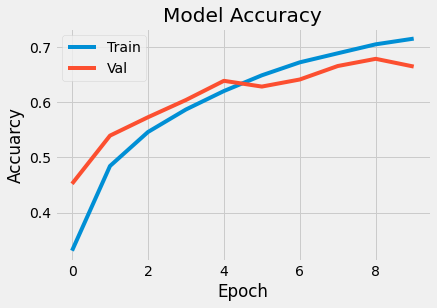

In [34]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuarcy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

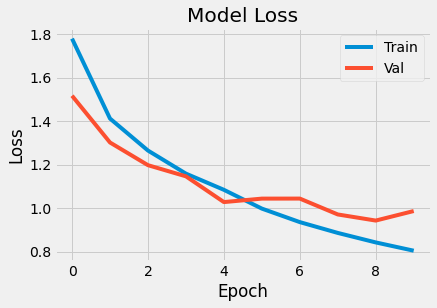

In [35]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper right')
plt.show()

In [38]:
from google.colab import files
uploaded=files.upload()

Saving Cat.png to Cat.png


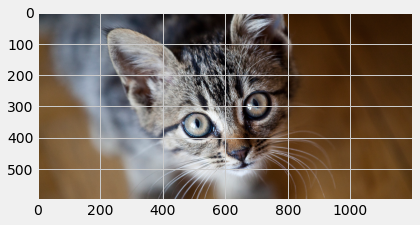

In [39]:
new_image=plt.imread('Cat.png')
img=plt.imshow(new_image)

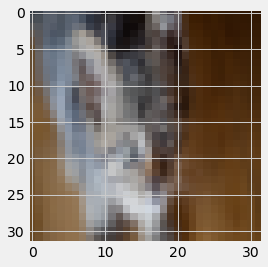

In [40]:
from skimage.transform import resize
resized_image=resize(new_image, (32, 32 ,3))
img=plt.imshow(resized_image)

In [41]:
predictions=model.predict(np.array([resized_image]))
predictions

array([[3.5430070e-03, 3.5072377e-04, 1.8245062e-02, 7.1608126e-01,
        6.1335191e-03, 2.3034696e-01, 8.8161258e-03, 1.0868662e-02,
        4.1941283e-03, 1.4204819e-03]], dtype=float32)

In [42]:
list_index=[0,1,2,3,4,5,6,7,8,9]
x=predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp=list_index[i]
      list_index[i]=list_index[j]
      list_index[j]=temp

print(list_index)

[3, 5, 2, 7, 6, 4, 8, 0, 9, 1]


In [47]:
for i in range(3):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100,2), '%')

cat : 71.61 %
dog : 23.03 %
bird : 1.82 %
